# WEEK 2 

## Data Exploration

### Cab_Data exploration

In [2]:
import pandas as pd
cab_data= pd.read_csv('Cab_Data.csv')
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], unit='D', origin='1899-12-30')
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


### City Data Exploration 

In [3]:
city_data= pd.read_csv('City.csv')
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


### Customer Data Exploration

In [4]:
customer_data= pd.read_csv('Customer_ID.csv')
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


### Transaction Data Exploration

In [5]:
transaction_data= pd.read_csv('Transaction_ID.csv')
transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [6]:
# Merge cab_data and city_data based on the 'City' column
merged_data1 = pd.merge(cab_data, city_data, on='City')

# Merge merged_data and customer_data based on the 'Customer ID' column
merged_data = pd.merge(merged_data1, transaction_data, on='Transaction ID')

# Merge merged_data and transaction_data based on the 'Transaction ID' column
final_data = pd.merge(merged_data, customer_data, on='Customer ID')
final_data.head()



,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,Card,Male,27,9237


## The hypothesis and vizualizations

### Hypothesis 1

#### 1.1 There are seasonal patterns in the number of customers using the cab service over the three-year time period

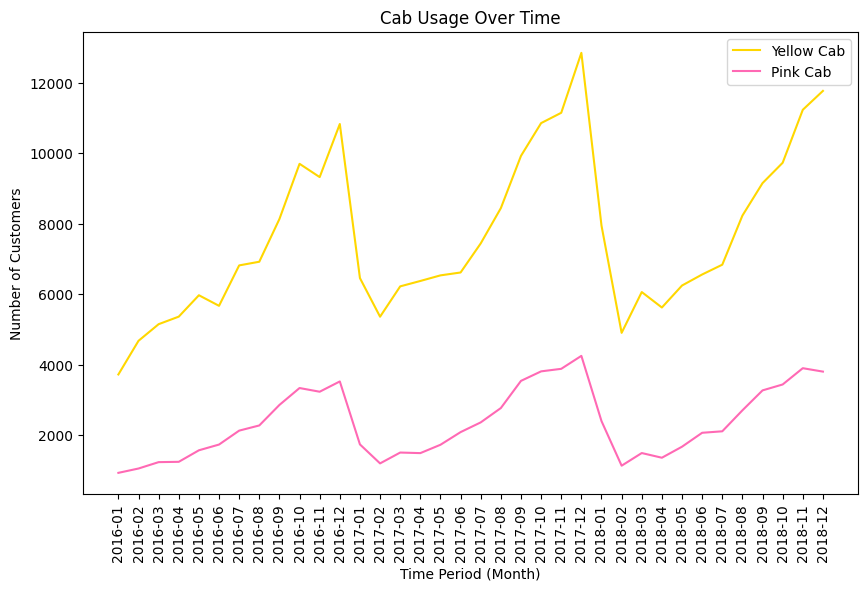

In [7]:
import matplotlib.pyplot as plt

# Grouping the data by month and counting the number of customers for each cab company
monthly_usage_yellow = cab_data[cab_data['Company'] == 'Yellow Cab'].groupby(cab_data['Date of Travel'].dt.to_period('M')).size()
monthly_usage_pink = cab_data[cab_data['Company'] == 'Pink Cab'].groupby(cab_data['Date of Travel'].dt.to_period('M')).size()

# Convert Period objects to strings
monthly_usage_yellow.index = monthly_usage_yellow.index.astype(str)
monthly_usage_pink.index = monthly_usage_pink.index.astype(str)

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the line chart for Yellow Cab with yellow color
plt.plot(monthly_usage_yellow.index, monthly_usage_yellow.values, color='gold', label='Yellow Cab')
# Plotting the line chart for Pink Cab with pink color
plt.plot(monthly_usage_pink.index, monthly_usage_pink.values, color='hotpink', label='Pink Cab')

plt.xlabel('Time Period (Month)')
plt.ylabel('Number of Customers')
plt.title('Cab Usage Over Time')

# Rotate x-axis tick labels vertically
plt.xticks(rotation='vertical')

# Add legend
plt.legend()

plt.show()


### 1.2 Cab Usage per day is higher for one of the two companies

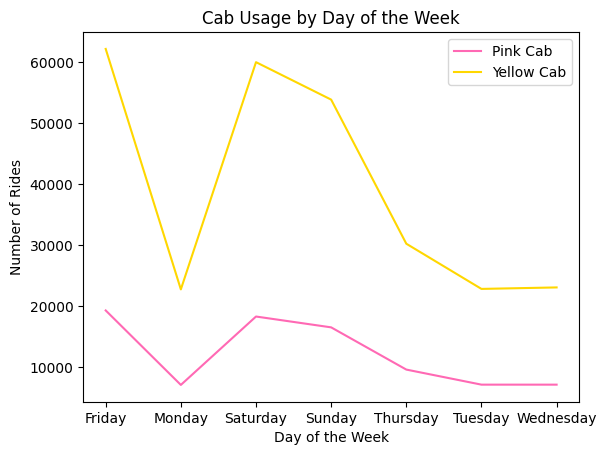

In [8]:
# Filter data for Pink Cab and Yellow Cab
pink_cab_data = cab_data[cab_data['Company'] == 'Pink Cab']
yellow_cab_data = cab_data[cab_data['Company'] == 'Yellow Cab']

# Grouping the data by day of the week and counting the number of rides for each company
pink_cab_usage = pink_cab_data['Date of Travel'].dt.day_name().value_counts().sort_index()
yellow_cab_usage = yellow_cab_data['Date of Travel'].dt.day_name().value_counts().sort_index()

# Creating a line chart to compare the usage by day of the week
plt.plot(pink_cab_usage.index, pink_cab_usage.values, label='Pink Cab', color="hotpink")
plt.plot(yellow_cab_usage.index, yellow_cab_usage.values, label='Yellow Cab',color='gold')

plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.title('Cab Usage by Day of the Week')
plt.legend()
plt.show()

### Hypothesis 2:
#### Cabs are more used in certain cities more in others

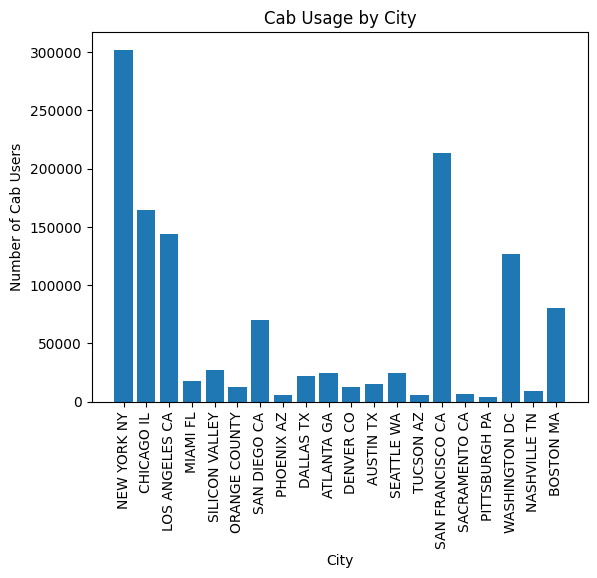

In [10]:
city_data['Users'] = city_data['Users'].str.replace(',', '').astype(int)
city_data['Population'] = city_data['Population'].str.replace(',', '').astype(int)

# Sorting the cities based on the number of users in descending order
city_data['Users']=city_data['Users'].astype(int)
city_data_sorted = city_data.sort_values('Users', ascending=False)
city_data_sorted.head(20)
city1=city_data['City']
user1=city_data['Users']
# Plotting the bar chart
plt.bar(city1, user1)
plt.xlabel('City')
plt.ylabel('Number of Cab Users')
plt.title('Cab Usage by City')
plt.xticks(rotation=90)
plt.show()


### Hypothesis 3:
#### Customer segments differ based on demographics.

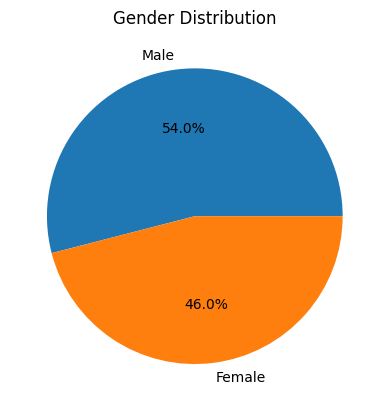

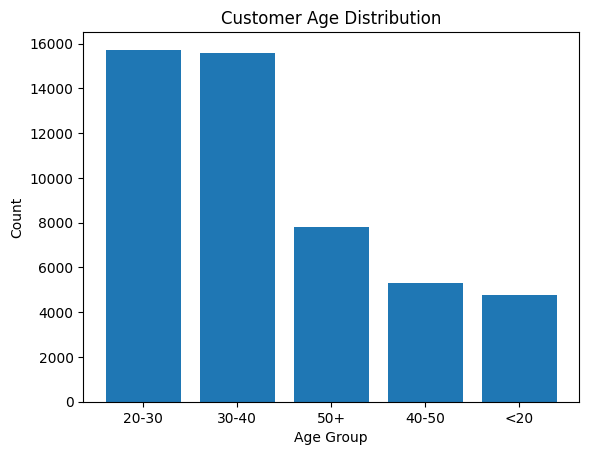

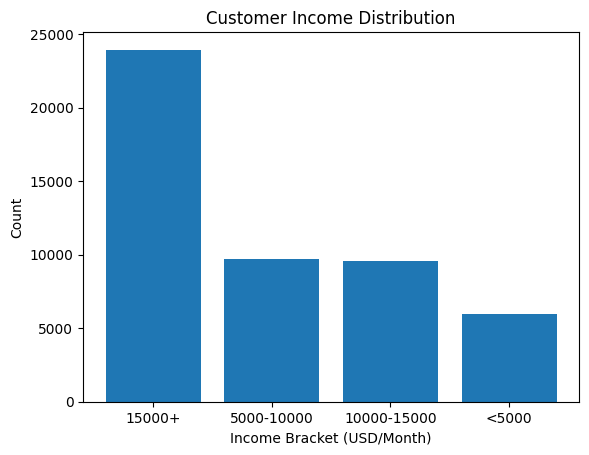

In [11]:
# Pie chart for gender distribution
gender_counts = customer_data['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

# Bar chart for age groups
age_groups = pd.cut(customer_data['Age'], bins=[0, 20, 30, 40, 50, float('inf')], labels=['<20', '20-30', '30-40', '40-50', '50+'])
age_group_counts = age_groups.value_counts()
plt.bar(age_group_counts.index, age_group_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Customer Age Distribution')
plt.show()

# Bar chart for income brackets
income_brackets = pd.cut(customer_data['Income (USD/Month)'], bins=[0, 5000, 10000, 15000, float('inf')], labels=['<5000', '5000-10000', '10000-15000', '15000+'])
income_bracket_counts = income_brackets.value_counts()
plt.bar(income_bracket_counts.index, income_bracket_counts.values)
plt.xlabel('Income Bracket (USD/Month)')
plt.ylabel('Count')
plt.title('Customer Income Distribution')
plt.show()


<Figure size 1000x600 with 0 Axes>

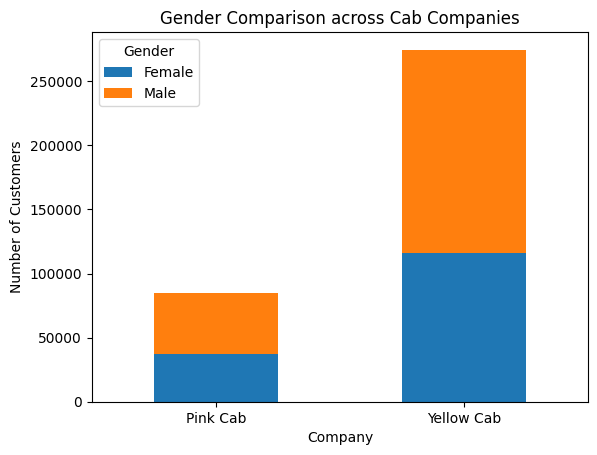

<Figure size 1000x600 with 0 Axes>

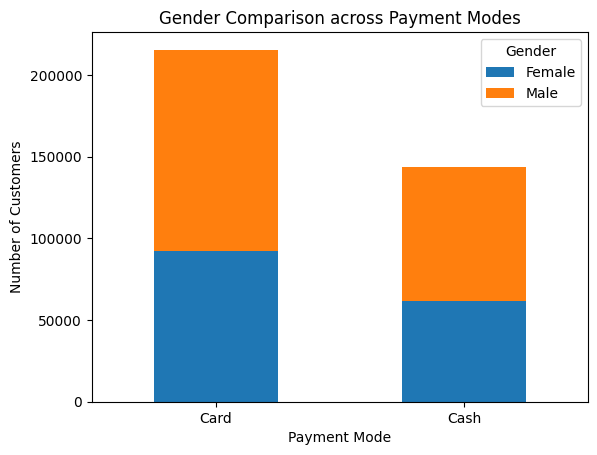

In [128]:

# Grouping the data by company and gender and counting the number of customers
company_gender_data = final_data.groupby(['Company', 'Gender']).size().unstack()

# Grouping the data by payment mode and gender and counting the number of customers
payment_gender_data = final_data.groupby(['Payment_Mode', 'Gender']).size().unstack()

# Set a smaller figure size
plt.figure(figsize=(10, 6))

# Plotting the stacked bar chart for comparing customer segments across cab companies
company_gender_data.plot(kind='bar', stacked=True)
plt.xlabel('Company')
plt.ylabel('Number of Customers')
plt.title('Gender Comparison across Cab Companies')
plt.xticks(rotation=0)
plt.legend(title='Gender')

plt.show()

# Set a smaller figure size
plt.figure(figsize=(10, 6))

# Plotting the stacked bar chart for comparing customer segments across payment modes
payment_gender_data.plot(kind='bar', stacked=True)
plt.xlabel('Payment Mode')
plt.ylabel('Number of Customers')
plt.title('Gender Comparison across Payment Modes')
plt.xticks(rotation=0)
plt.legend(title='Gender')

plt.show()



### Hypothesis 4:
#### Profitability differs between the two cab companies.

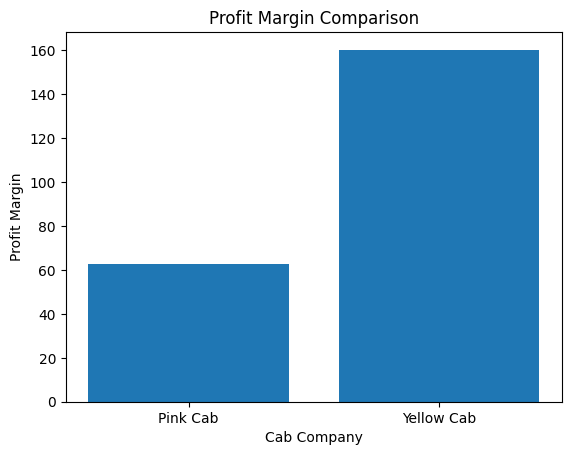

In [12]:
profit_margin = (cab_data['Price Charged'] - cab_data['Cost of Trip']).groupby(cab_data['Company']).mean()

# Plotting the bar chart with customized colors
plt.bar(profit_margin.index, profit_margin.values)
plt.xlabel('Cab Company')
plt.ylabel('Profit Margin')
plt.title('Profit Margin Comparison')
plt.show()


### Hypothesis 5: 
### One of the two companies has a higher profit. Analysis of Profits

/var/folders/dp/0zq5h63j5ls75dtq6pn2d6r00000gn/T/ipykernel_24658/2015884146.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_profit_yellow_cab = yellow_cab_data.groupby('City')['Price Charged', 'Cost of Trip'].mean()


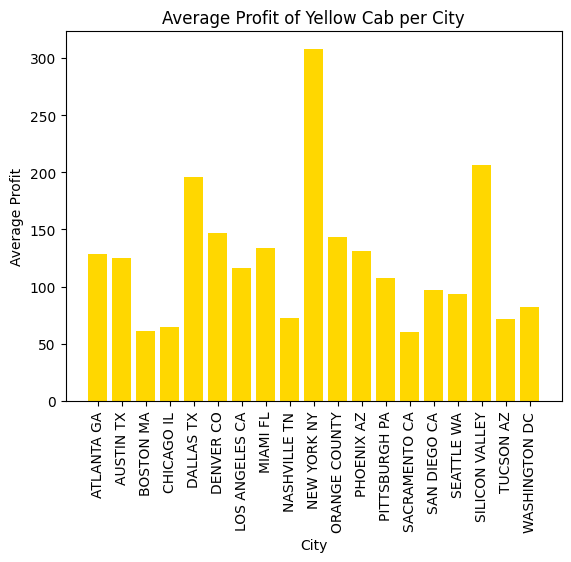

In [13]:

# Filter the data for Yellow Cab company
yellow_cab_data = cab_data[cab_data['Company'] == 'Yellow Cab']

# Calculate the average profit per city for Yellow Cab
average_profit_yellow_cab = yellow_cab_data.groupby('City')['Price Charged', 'Cost of Trip'].mean()
average_profit_yellow_cab['Profit'] = average_profit_yellow_cab['Price Charged'] - average_profit_yellow_cab['Cost of Trip']

# Reset the index for easier plotting
average_profit_yellow_cab = average_profit_yellow_cab.reset_index()

# Plotting the bar chart
plt.bar(range(len(average_profit_yellow_cab)), average_profit_yellow_cab['Profit'], color='gold')
plt.xlabel('City')
plt.ylabel('Average Profit')
plt.title('Average Profit of Yellow Cab per City')
plt.xticks(range(len(average_profit_yellow_cab)), average_profit_yellow_cab['City'], rotation=90)
plt.show()


/var/folders/dp/0zq5h63j5ls75dtq6pn2d6r00000gn/T/ipykernel_24658/257896949.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_profit_yellow_cab = yellow_cab_data.groupby('City')['Price Charged', 'Cost of Trip'].mean()


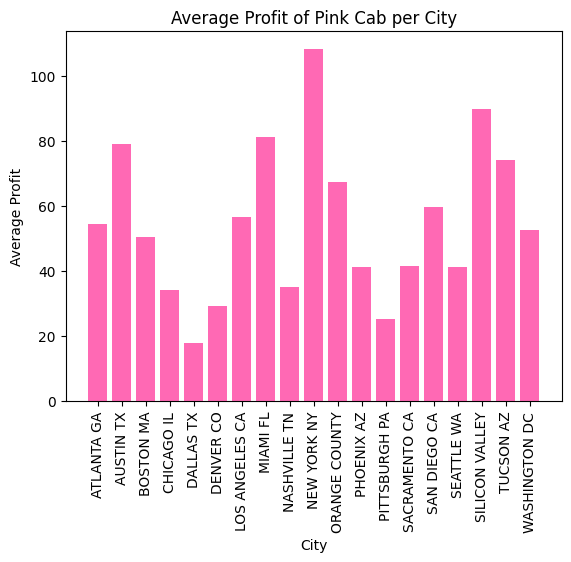

In [14]:
# Filter the data for Yellow Cab company
yellow_cab_data = cab_data[cab_data['Company'] == 'Pink Cab']

# Calculate the average profit per city for Yellow Cab
average_profit_yellow_cab = yellow_cab_data.groupby('City')['Price Charged', 'Cost of Trip'].mean()
average_profit_yellow_cab['Profit'] = average_profit_yellow_cab['Price Charged'] - average_profit_yellow_cab['Cost of Trip']

# Reset the index for easier plotting
average_profit_yellow_cab = average_profit_yellow_cab.reset_index()

# Plotting the bar chart
plt.bar(range(len(average_profit_yellow_cab)), average_profit_yellow_cab['Profit'], color='hotpink')
plt.xlabel('City')
plt.ylabel('Average Profit')
plt.title('Average Profit of Pink Cab per City')
plt.xticks(range(len(average_profit_yellow_cab)), average_profit_yellow_cab['City'], rotation=90)
plt.show()

/var/folders/dp/0zq5h63j5ls75dtq6pn2d6r00000gn/T/ipykernel_24658/2736729099.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_profit_yellow_cab = yellow_cab_data.groupby('City')['Price Charged', 'Cost of Trip'].mean()
/var/folders/dp/0zq5h63j5ls75dtq6pn2d6r00000gn/T/ipykernel_24658/2736729099.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_profit_pink_cab = pink_cab_data.groupby('City')['Price Charged', 'Cost of Trip'].mean()


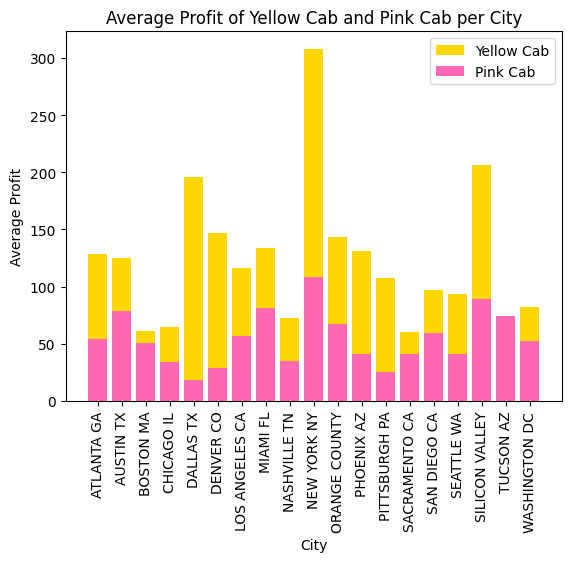

In [15]:

# Filter the data for Yellow Cab company
yellow_cab_data = cab_data[cab_data['Company'] == 'Yellow Cab']

# Calculate the average profit per city for Yellow Cab
average_profit_yellow_cab = yellow_cab_data.groupby('City')['Price Charged', 'Cost of Trip'].mean()
average_profit_yellow_cab['Profit'] = average_profit_yellow_cab['Price Charged'] - average_profit_yellow_cab['Cost of Trip']

# Reset the index for easier plotting
average_profit_yellow_cab = average_profit_yellow_cab.reset_index()

# Filter the data for Pink Cab company
pink_cab_data = cab_data[cab_data['Company'] == 'Pink Cab']

# Calculate the average profit per city for Pink Cab
average_profit_pink_cab = pink_cab_data.groupby('City')['Price Charged', 'Cost of Trip'].mean()
average_profit_pink_cab['Profit'] = average_profit_pink_cab['Price Charged'] - average_profit_pink_cab['Cost of Trip']

# Reset the index for easier plotting
average_profit_pink_cab = average_profit_pink_cab.reset_index()

# Plotting the bar chart
plt.bar(range(len(average_profit_yellow_cab)), average_profit_yellow_cab['Profit'], color='gold', label='Yellow Cab')
plt.bar(range(len(average_profit_pink_cab)), average_profit_pink_cab['Profit'], color='hotpink', label='Pink Cab')
plt.xlabel('City')
plt.ylabel('Average Profit')
plt.title('Average Profit of Yellow Cab and Pink Cab per City')
plt.xticks(range(len(average_profit_yellow_cab)), average_profit_yellow_cab['City'], rotation=90)
plt.legend()
plt.show()

### Hypotheisis 6:
### Both companies do not charge the same amount to their customers.

#### 6.1.Price charged per kilometer differs between Pink Cab and Yellow Cab

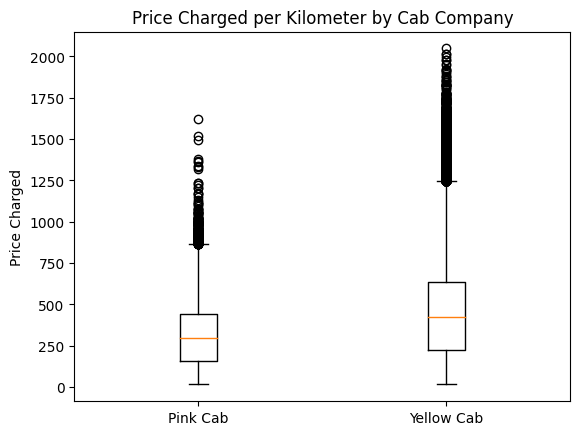

In [16]:
# Filter data for Pink Cab and Yellow Cab
pink_cab_prices = cab_data[cab_data['Company'] == 'Pink Cab']['Price Charged']
yellow_cab_prices = cab_data[cab_data['Company'] == 'Yellow Cab']['Price Charged']

# Creating a box plot to compare the price charged per kilometer
plt.boxplot([pink_cab_prices, yellow_cab_prices], labels=['Pink Cab', 'Yellow Cab'])
plt.ylabel('Price Charged')
plt.title('Price Charged per Kilometer by Cab Company')
plt.show()


#### 6.2 The average cost of trips differs between Pink Cab and Yellow Cab

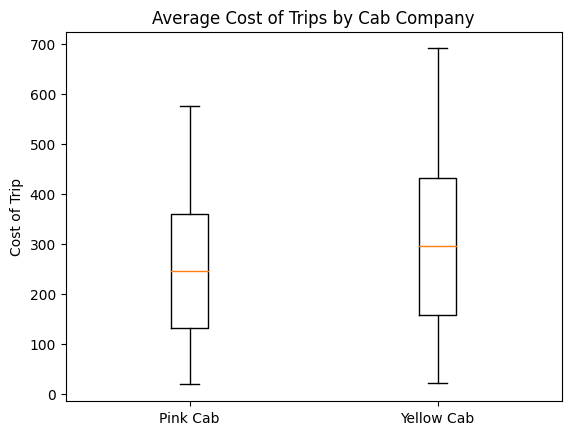

In [17]:
# Filter data for Pink Cab and Yellow Cab
pink_cab_costs = cab_data[cab_data['Company'] == 'Pink Cab']['Cost of Trip']
yellow_cab_costs = cab_data[cab_data['Company'] == 'Yellow Cab']['Cost of Trip']

# Creating a box plot to compare the average cost of trips
plt.boxplot([pink_cab_costs, yellow_cab_costs], labels=['Pink Cab', 'Yellow Cab'])
plt.ylabel('Cost of Trip')
plt.title('Average Cost of Trips by Cab Company')
plt.show()

### Hypotheisis 7:
### The distribution of customer between the two companies is impacted by certain factors.

#### 7.1 The choice of cab company is based on Age

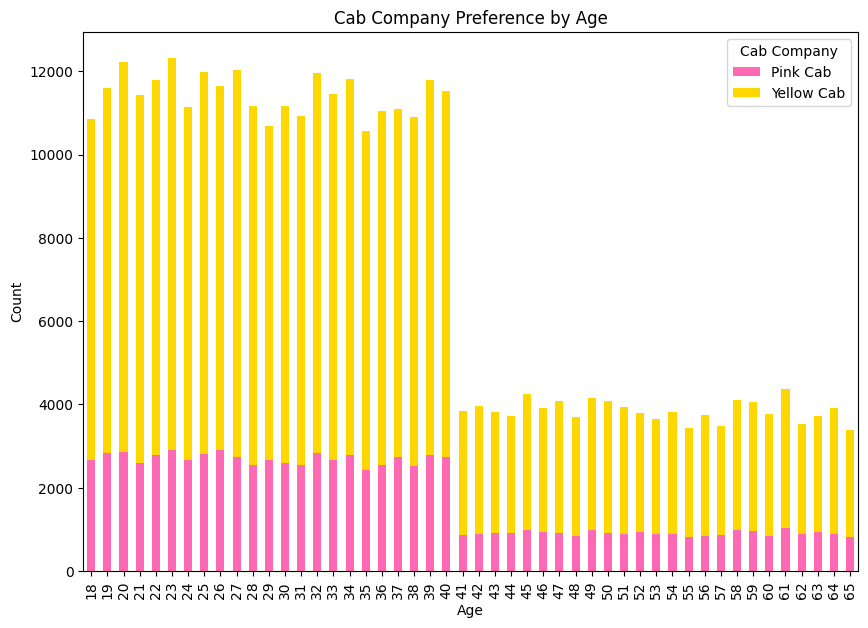

In [18]:
# Merging the customer_data and cab_data DataFrames on the 'Customer ID' column
merged_data = customer_data.merge(transaction_data, on='Customer ID')
merged_data2 = merged_data.merge(cab_data, on='Transaction ID')
# Grouping the merged data by age and cab company, and counting the number of rides
age_company_counts = merged_data2.groupby(['Age', 'Company'])['Customer ID'].count().unstack()

# Creating a stacked bar chart
age_company_counts.plot(kind='bar', stacked=True, figsize=(10,7), color=['hotpink', 'gold'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Cab Company Preference by Age')
plt.xticks(rotation=90)
plt.legend(title='Cab Company')
plt.show()



#### 7.2. Customer gender influences the choice of cab company.

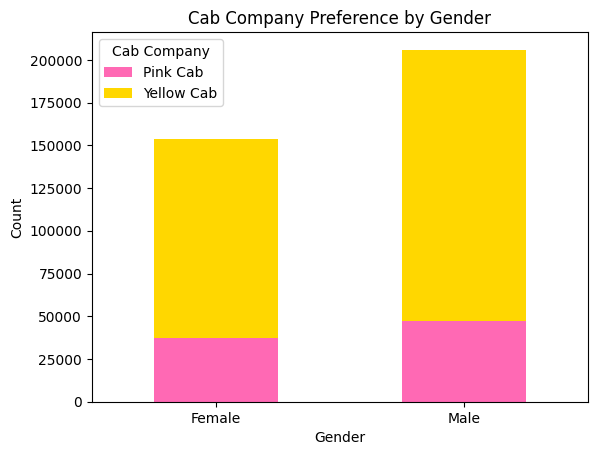

In [19]:
# Merging the customer_data and cab_data DataFrames on the 'Customer ID' column
merged_data = customer_data.merge(transaction_data, on='Customer ID')
merged_data2 = merged_data.merge(cab_data, on='Transaction ID')

# Grouping the merged data by gender and cab company, and counting the number of rides
gender_company_counts = merged_data2.groupby(['Gender', 'Company'])['Customer ID'].count().unstack()

# Creating a stacked bar chart
gender_company_counts.plot(kind='bar', stacked=True, color=['hotpink', 'gold'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Cab Company Preference by Gender')
plt.xticks(rotation=0)
plt.legend(title='Cab Company')
plt.show()


#### 7.3 The proportion of female customers differs between Pink Cab and Yellow Cab.

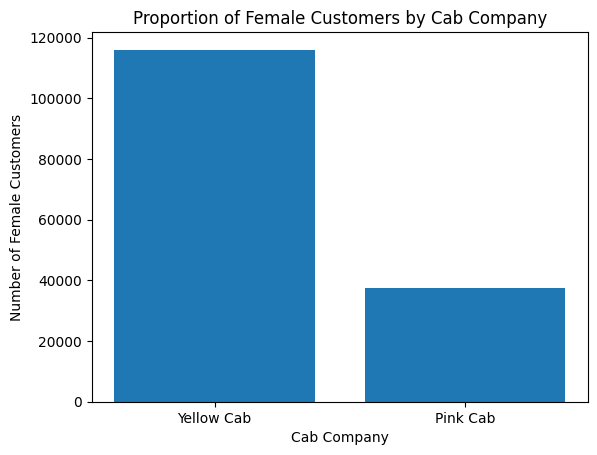

In [20]:

# Merging the customer_data and cab_data DataFrames on the 'Customer ID' column
merged_data = customer_data.merge(transaction_data, on='Customer ID')
merged_data2 = merged_data.merge(cab_data, on='Transaction ID')

# Counting the number of female customers for each cab company
female_counts = merged_data2[merged_data2['Gender'] == 'Female']['Company'].value_counts()

# Creating a bar chart to compare the proportion of female customers
plt.bar(female_counts.index, female_counts.values)
plt.xlabel('Cab Company')
plt.ylabel('Number of Female Customers')
plt.title('Proportion of Female Customers by Cab Company')
plt.show()


## Conclusion:

#### We have evaluated both the cab companies on following points and found Yellow cab better than Pink cab:
#### Market Dominance: The Yellow cab company holds the largest market share in both New York and Silicon Valley. This suggests a strong foothold in these profitable markets.
#### Profitability: New York and Silicon Valley are identified as the cities generating the highest profits, with New York leading the way. Acquiring the Yellow cab company would provide an opportunity to capitalize on its successful revenue generation in these lucrative regions.
#### Customer Demographics: Men represent the predominant gender among cab users in both cities, indicating a potential target market that aligns with the Yellow cab company's existing customer base.
#### Income Distribution: The majority of customers fall within the highest income bracket. This implies that the Yellow cab company may have an advantage in attracting higher-paying customers and potentially generating higher fares.
#### Considering these factors, acquiring the Yellow cab company would likely provide an opportunity to leverage its market dominance, profitability, and alignment with the predominant customer demographics in order to further expand and capitalize on the cab industry's potential in these regions.

## Additional Insights

### 1. The average distance traveled is different between Pink Cab and Yellow Cab.

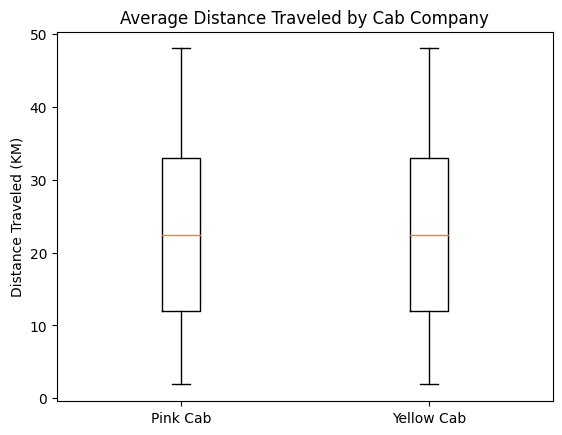

In [21]:
# Filter data for Pink Cab and Yellow Cab
pink_cab_distances = cab_data[cab_data['Company'] == 'Pink Cab']['KM Travelled']
yellow_cab_distances = cab_data[cab_data['Company'] == 'Yellow Cab']['KM Travelled']

# Creating a box plot to compare the average distance traveled
plt.boxplot([pink_cab_distances, yellow_cab_distances], labels=['Pink Cab', 'Yellow Cab'])
plt.ylabel('Distance Traveled (KM)')
plt.title('Average Distance Traveled by Cab Company')
plt.show()

### 2.Payment mode prefered by city

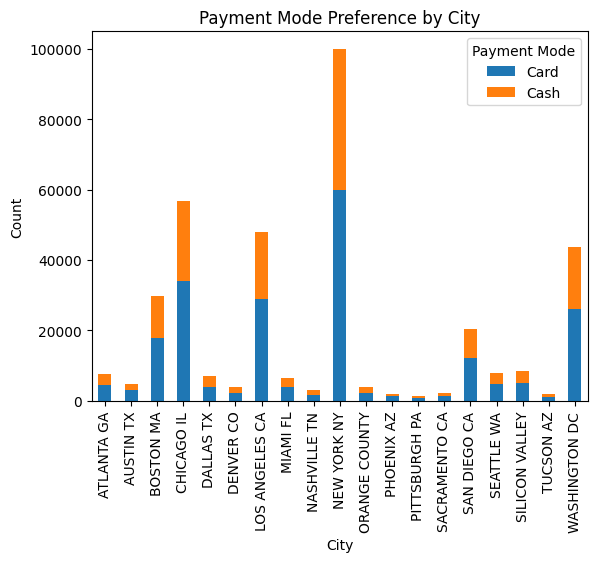

In [22]:
# Merging the city_data and transaction_data DataFrames on the 'City' column
# city_merged_data = city_data.merge(transaction_data, on='City')

# Counting the number of payment modes for each city
payment_mode_counts = final_data.groupby(['City', 'Payment_Mode'])['Transaction ID'].count().unstack()

# Creating a stacked bar chart
payment_mode_counts.plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Payment Mode Preference by City')
plt.xticks(rotation=90)
plt.legend(title='Payment Mode')
plt.show()